In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel('CreditCardBalance.xlsx')

In [4]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   CODE_GENDER          24672 non-null  object 
 2   FLAG_OWN_CAR         24672 non-null  object 
 3   FLAG_OWN_REALTY      24672 non-null  object 
 4   CNT_CHILDREN         24672 non-null  int64  
 5   AMT_INCOME_TOTAL     24672 non-null  float64
 6   NAME_INCOME_TYPE     24672 non-null  object 
 7   NAME_EDUCATION_TYPE  24672 non-null  object 
 8   NAME_FAMILY_STATUS   24672 non-null  object 
 9   NAME_HOUSING_TYPE    24672 non-null  object 
 10  AGE                  24672 non-null  float64
 11  CURRENT EMPLOY       24672 non-null  int64  
 12  FLAG_MOBIL           24672 non-null  int64  
 13  FLAG_WORK_PHONE      24672 non-null  int64  
 14  FLAG_PHONE           24672 non-null  int64  
 15  FLAG_EMAIL           24672 non-null 

In [6]:
df.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
AGE                       0
CURRENT EMPLOY            0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        7629
CNT_FAM_MEMBERS           0
STATUS                    0
APPROVED                  0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
CURRENT EMPLOY         0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
APPROVED               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17043 entries, 2 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17043 non-null  int64  
 1   CODE_GENDER          17043 non-null  object 
 2   FLAG_OWN_CAR         17043 non-null  object 
 3   FLAG_OWN_REALTY      17043 non-null  object 
 4   CNT_CHILDREN         17043 non-null  int64  
 5   AMT_INCOME_TOTAL     17043 non-null  float64
 6   NAME_INCOME_TYPE     17043 non-null  object 
 7   NAME_EDUCATION_TYPE  17043 non-null  object 
 8   NAME_FAMILY_STATUS   17043 non-null  object 
 9   NAME_HOUSING_TYPE    17043 non-null  object 
 10  AGE                  17043 non-null  float64
 11  CURRENT EMPLOY       17043 non-null  int64  
 12  FLAG_MOBIL           17043 non-null  int64  
 13  FLAG_WORK_PHONE      17043 non-null  int64  
 14  FLAG_PHONE           17043 non-null  int64  
 15  FLAG_EMAIL           17043 non-null 

In [10]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
count,1.704300e+04,17043.000000,1.704300e+04,17043.000000,17043.000000,17043.0,17043.000000,17043.000000,17043.000000,17043.000000,17043.000000
mean,5.079323e+06,0.498328,1.953770e+05,40.699356,0.997712,1.0,0.276418,0.290911,0.101391,2.274071,0.705744
std,4.172272e+04,0.793734,1.049344e+05,9.543564,0.047783,0.0,0.447239,0.454196,0.301854,0.944127,0.455721
min,5.008806e+06,0.000000,2.700000e+04,20.517808,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045671e+06,0.000000,1.350000e+05,32.936986,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078987e+06,0.000000,1.800000e+05,40.131507,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
75%,5.115642e+06,1.000000,2.250000e+05,47.961644,1.000000,1.0,1.000000,1.000000,0.000000,3.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,67.427397,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [11]:
dfq = df.copy()
dfq.shape

(17043, 20)

In [12]:
dfq["zscore_CNT_CHILDREN"] = np.abs(stats.zscore(dfq["CNT_CHILDREN"]))
dfq.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore_CNT_CHILDREN
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1,0.627845
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0,0.627845
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.627845
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.627845
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,0,0,0.627845


In [13]:
z_outliers = dfq.loc[dfq["zscore_CNT_CHILDREN"] > 3].index

## Preview list of index values
print(z_outliers)

Int64Index([ 1405,  1461,  1462,  1463,  1777,  1778,  1779,  1780,  2053,
             2182,
            ...
            24554, 24555, 24581, 24612, 24613, 24615, 24635, 24652, 24664,
            24667],
           dtype='int64', length=279)


In [14]:
dfq = df.copy()
dfq.shape

(17043, 20)

In [15]:
q1 = dfq["CNT_CHILDREN"].quantile(.25)
q3 = dfq["CNT_CHILDREN"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

Q1: 0.0
Q3: 1.0


In [16]:
iqr = q3 - q1

print("IQR:", iqr)

IQR: 1.0


In [17]:
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

Upper Limit: 2.5
Lower Limit: -1.5


In [18]:
iqr_outliers = dfq.loc[(dfq['CNT_CHILDREN'] > top) | (dfq['CNT_CHILDREN'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

INDEX VALUES: Int64Index([ 1405,  1461,  1462,  1463,  1777,  1778,  1779,  1780,  2053,
             2182,
            ...
            24554, 24555, 24581, 24612, 24613, 24615, 24635, 24652, 24664,
            24667],
           dtype='int64', length=279)


In [19]:
dfq.loc[dfq["CNT_FAM_MEMBERS"] > 8]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
9571,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,48.641096,1,1,0,0,0,Drivers,15,0,0
9572,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,48.641096,1,1,0,0,0,Drivers,15,0,0
9573,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,48.641096,1,1,0,0,0,Drivers,15,0,0
17054,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,30.293151,1,1,1,1,0,Waiters/barmen staff,20,0,0


In [20]:
dfq.drop([9571,9572,9573,17054], inplace = True)

In [21]:
dfq.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
count,1.703900e+04,17039.000000,1.703900e+04,17039.000000,17039.000000,17039.0,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000
mean,5.079325e+06,0.494865,1.953766e+05,40.698569,0.997711,1.0,0.276425,0.290921,0.101414,2.270791,0.705910
std,4.172645e+04,0.760238,1.049440e+05,9.543769,0.047789,0.0,0.447242,0.454200,0.301886,0.919030,0.455646
min,5.008806e+06,0.000000,2.700000e+04,20.517808,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045670e+06,0.000000,1.350000e+05,32.936986,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078988e+06,0.000000,1.800000e+05,40.131507,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
75%,5.115644e+06,1.000000,2.250000e+05,47.956164,1.000000,1.0,1.000000,1.000000,0.000000,3.000000,1.000000
max,5.150487e+06,5.000000,1.575000e+06,67.427397,1.000000,1.0,1.000000,1.000000,1.000000,7.000000,1.000000


In [22]:
dfq.shape

(17039, 20)

In [23]:
dfq["zscore_AMT_INCOME_TOTAL"] = np.abs(stats.zscore(dfq["AMT_INCOME_TOTAL"]))
dfq.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore_AMT_INCOME_TOTAL
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1,0.789745
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0,0.711099
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.711099
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.711099
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,0,0,0.711099


In [24]:
z_outliers = dfq.loc[dfq["zscore_AMT_INCOME_TOTAL"] > 3].index

## Preview list of index values
print(z_outliers)

Int64Index([  144,   145,   146,   278,   279,   469,   470,   471,   838,
              839,
            ...
            22889, 22890, 23489, 23490, 23668, 23669, 24373, 24498, 24628,
            24629],
           dtype='int64', length=230)


In [25]:
dfq = dfq.drop(z_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(dfq.shape)

(16809, 21)


In [26]:
dfq["zscore_AGE"] = np.abs(stats.zscore(dfq["AGE"]))
dfq.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore_AMT_INCOME_TOTAL,zscore_AGE
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1,0.789745,1.904843
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0,0.711099,1.226052
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.711099,1.226052
5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1,0.711099,1.226052
7,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,1,1,1,1,Accountants,2,0,0,0.711099,0.583439


In [27]:
z_outliers = dfq.loc[dfq["zscore_AGE"] > 3].index

## Preview list of index values
print(z_outliers)

Int64Index([], dtype='int64')


In [28]:
dfq['NAME_INCOME_TYPE'].value_counts()

Working                 10519
Commercial associate     4715
State servant            1554
Pensioner                  13
Student                     8
Name: NAME_INCOME_TYPE, dtype: int64

In [29]:
dfq['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    11354
Higher education                  4629
Incomplete higher                  673
Lower secondary                    143
Academic degree                     10
Name: NAME_EDUCATION_TYPE, dtype: int64

In [30]:
dfq['NAME_FAMILY_STATUS'].value_counts()

Married                 11666
Single / not married     2356
Civil marriage           1440
Separated                 959
Widow                     388
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
dfq['NAME_HOUSING_TYPE'].value_counts()

House / apartment      14774
With parents             973
Municipal apartment      554
Rented apartment         291
Office apartment         127
Co-op apartment           90
Name: NAME_HOUSING_TYPE, dtype: int64

In [32]:
dfq['OCCUPATION_TYPE'].value_counts()

Laborers                 4280
Core staff               2356
Sales staff              2303
Managers                 1883
Drivers                  1493
High skill tech staff     945
Accountants               832
Medicine staff            796
Cooking staff             449
Security staff            403
Cleaning staff            385
Private service staff     235
Low-skill Laborers        123
Secretaries                98
Waiters/barmen staff       87
HR staff                   49
Realty agents              47
IT staff                   45
Name: OCCUPATION_TYPE, dtype: int64

In [33]:
dfq.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED,zscore_AMT_INCOME_TOTAL,zscore_AGE
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1,0.789745,1.904843
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0,0.711099,1.226052


In [34]:
dfz = dfq.drop(columns = ["ID", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "zscore_AMT_INCOME_TOTAL", "zscore_AGE"])

In [35]:
dfz["AMT_INCOME_TOTAL"].groupby(dfz["APPROVED"]).mean()

APPROVED
0    188165.505371
1    188363.834147
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
dfz["CNT_CHILDREN"].groupby(dfz["APPROVED"]).mean()

APPROVED
0    0.509120
1    0.487495
Name: CNT_CHILDREN, dtype: float64

In [37]:
dfz["AGE"].groupby(dfz["APPROVED"]).mean()

APPROVED
0    40.784528
1    40.605072
Name: AGE, dtype: float64

In [38]:
pd.crosstab(dfz["CODE_GENDER"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
CODE_GENDER,,,
F,3087,7309,10396
M,1847,4566,6413
All,4934,11875,16809


In [39]:
pd.crosstab(dfz["FLAG_OWN_CAR"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
FLAG_OWN_CAR,,,
N,2933,6899,9832
Y,2001,4976,6977
All,4934,11875,16809


In [40]:
pd.crosstab(dfz["FLAG_OWN_REALTY"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
FLAG_OWN_REALTY,,,
N,1713,4302,6015
Y,3221,7573,10794
All,4934,11875,16809


In [41]:
pd.crosstab(dfz["NAME_INCOME_TYPE"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
NAME_INCOME_TYPE,,,
Commercial associate,1389,3326,4715
Pensioner,5,8,13
State servant,457,1097,1554
Student,2,6,8
Working,3081,7438,10519
All,4934,11875,16809


In [42]:
pd.crosstab(dfz["NAME_EDUCATION_TYPE"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
NAME_EDUCATION_TYPE,,,
Academic degree,1,9,10
Higher education,1291,3338,4629
Incomplete higher,218,455,673
Lower secondary,50,93,143
Secondary / secondary special,3374,7980,11354
All,4934,11875,16809


In [43]:
pd.crosstab(dfz["NAME_FAMILY_STATUS"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
NAME_FAMILY_STATUS,,,
Civil marriage,394,1046,1440
Married,3383,8283,11666
Separated,281,678,959
Single / not married,754,1602,2356
Widow,122,266,388
All,4934,11875,16809


In [44]:
pd.crosstab(dfz["NAME_HOUSING_TYPE"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
NAME_HOUSING_TYPE,,,
Co-op apartment,27,63,90
House / apartment,4350,10424,14774
Municipal apartment,173,381,554
Office apartment,36,91,127
Rented apartment,89,202,291
With parents,259,714,973
All,4934,11875,16809


In [45]:
pd.crosstab(dfz["CURRENT EMPLOY"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
CURRENT EMPLOY,,,
0,37,0,37
1,4897,11875,16772
All,4934,11875,16809


In [46]:
pd.crosstab(dfz["OCCUPATION_TYPE"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
OCCUPATION_TYPE,,,
Accountants,225,607,832
Cleaning staff,130,255,385
Cooking staff,156,293,449
Core staff,680,1676,2356
Drivers,444,1049,1493
HR staff,23,26,49
High skill tech staff,269,676,945
IT staff,16,29,45
Laborers,1201,3079,4280


In [47]:
pd.crosstab(dfz["STATUS"], dfz["APPROVED"], margins=True)

APPROVED,0,1,All
STATUS,,,
0,4708,0,4708
1,165,0,165
2,12,0,12
3,3,0,3
4,4,0,4
5,42,0,42
C,0,8788,8788
X,0,3087,3087
All,4934,11875,16809


OBJECTIVE 2

I think we can see that from some of the labels, this is probably not an American study.
The labels of education would probably be high school, some college, college degree, gradschool.
State servant and pensioner are labels you don't usually see in America either.
A fair amount of civil marragies?
I see a relatively high number of laborers and NO TEACHERS???
And most people are married or (civilly married) - does that mean they are more stable?
Where was this dataset pulled from?

In [48]:
dfz.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,Security staff,2,C,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,Sales staff,1,0,0


(array([ 517., 2070., 2597., 2711., 2804., 2210., 2059., 1202.,  523.,
         116.]),
 array([20.51780822, 25.20876712, 29.89972603, 34.59068493, 39.28164384,
        43.97260274, 48.66356164, 53.35452055, 58.04547945, 62.73643836,
        67.42739726]),
 <a list of 10 Patch objects>)

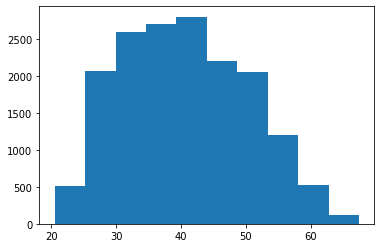

In [49]:
plt.hist(dfz['AGE'])

(array([1.0865e+04, 0.0000e+00, 3.9140e+03, 0.0000e+00, 1.7600e+03,
        0.0000e+00, 2.2200e+02, 0.0000e+00, 3.9000e+01, 9.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

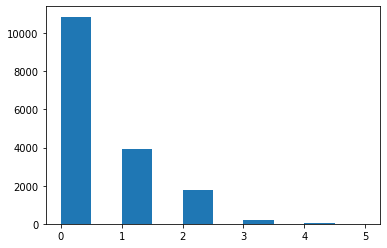

In [50]:
plt.hist(dfz['CNT_CHILDREN'])

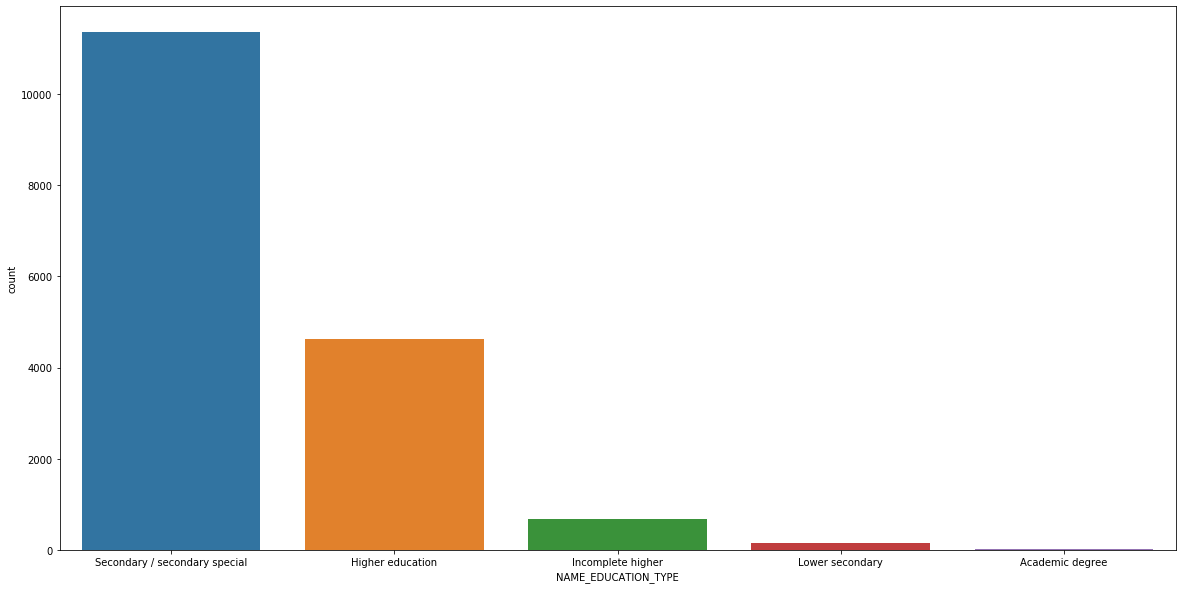

In [51]:
plt.figure(figsize=(20,10))


sns.countplot(data = dfz, x = "NAME_EDUCATION_TYPE")

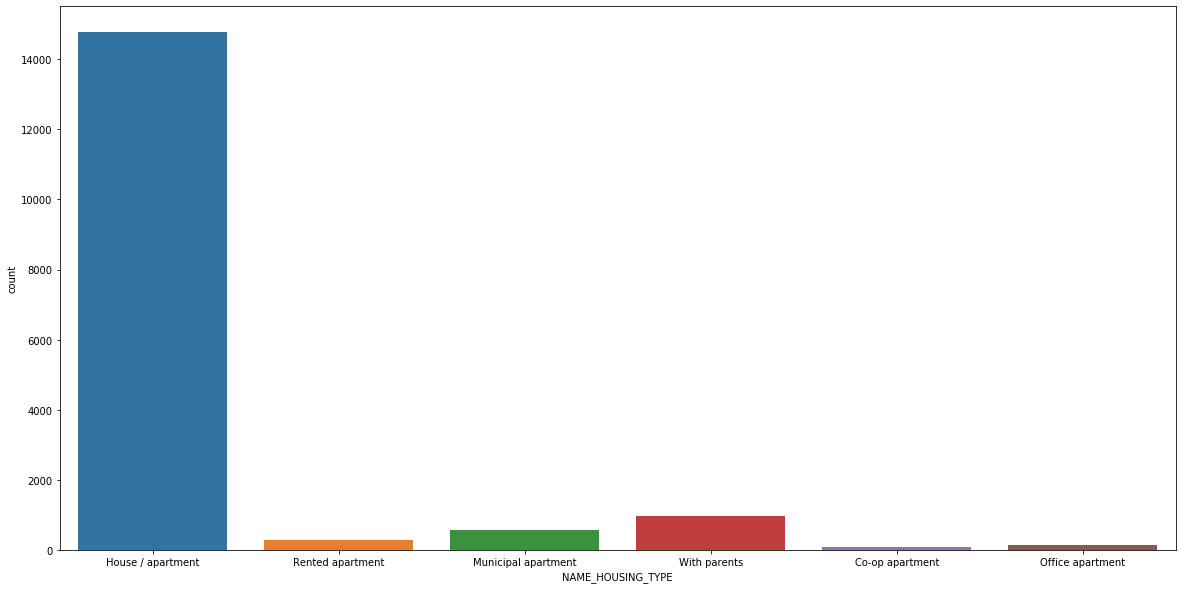

In [52]:
plt.figure(figsize=(20,10))


sns.countplot(data = dfz, x = "NAME_HOUSING_TYPE")

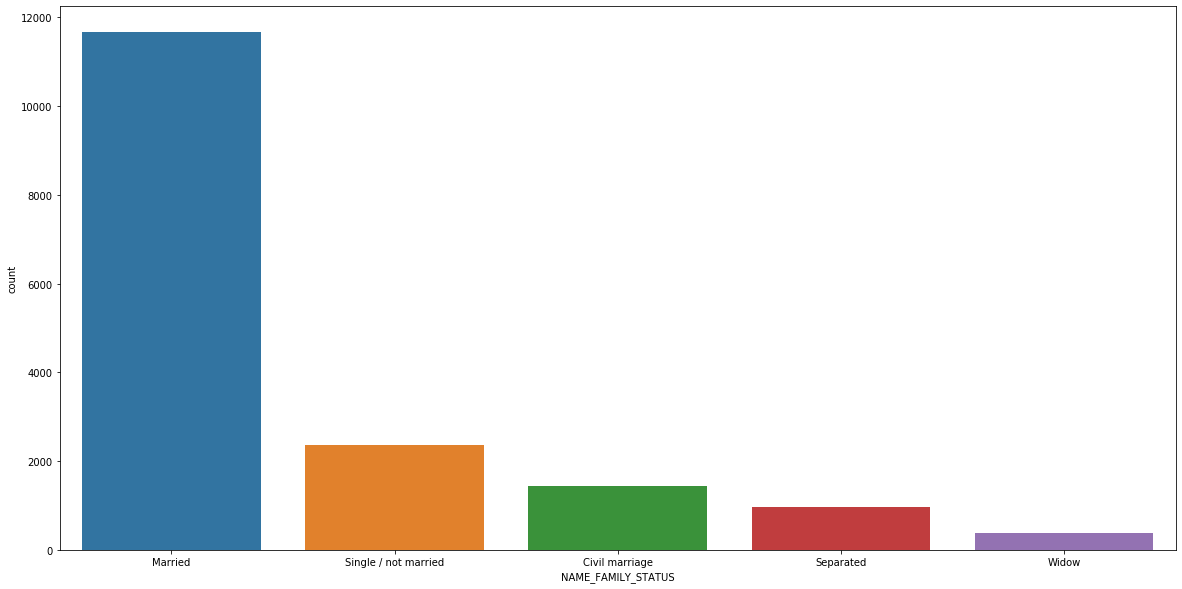

In [53]:
plt.figure(figsize=(20,10))


sns.countplot(data = dfz, x = "NAME_FAMILY_STATUS")

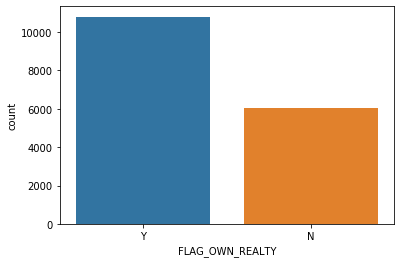

In [54]:
sns.countplot(data = dfz, x = "FLAG_OWN_REALTY")

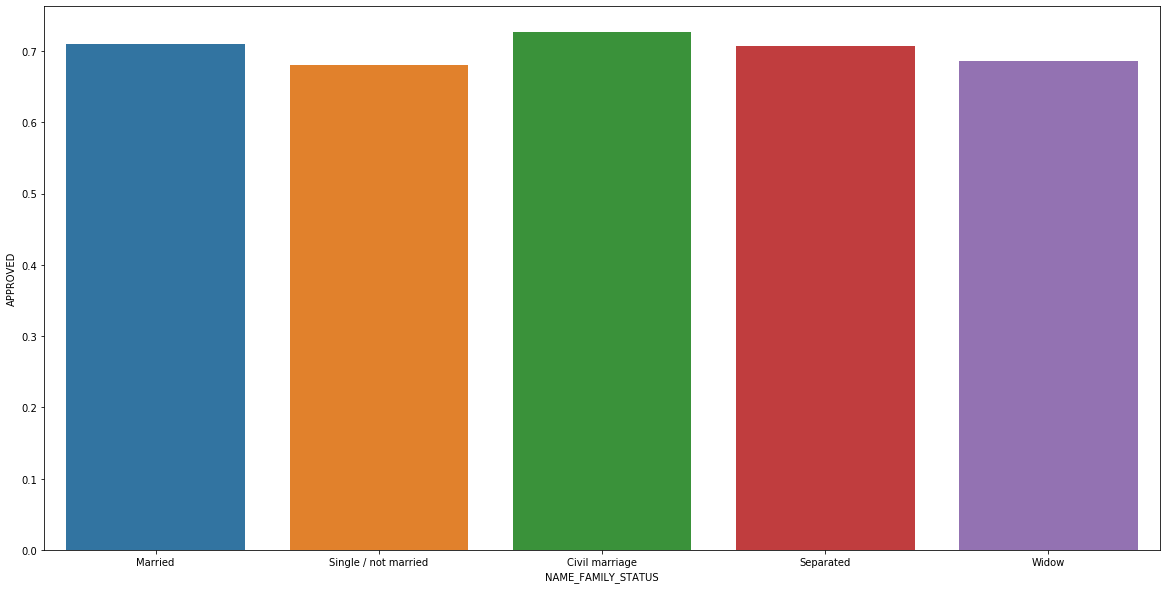

In [55]:
plt.figure(figsize=(20,10))

sns.barplot(data = dfq, x = "NAME_FAMILY_STATUS", y = "APPROVED", ci = None)


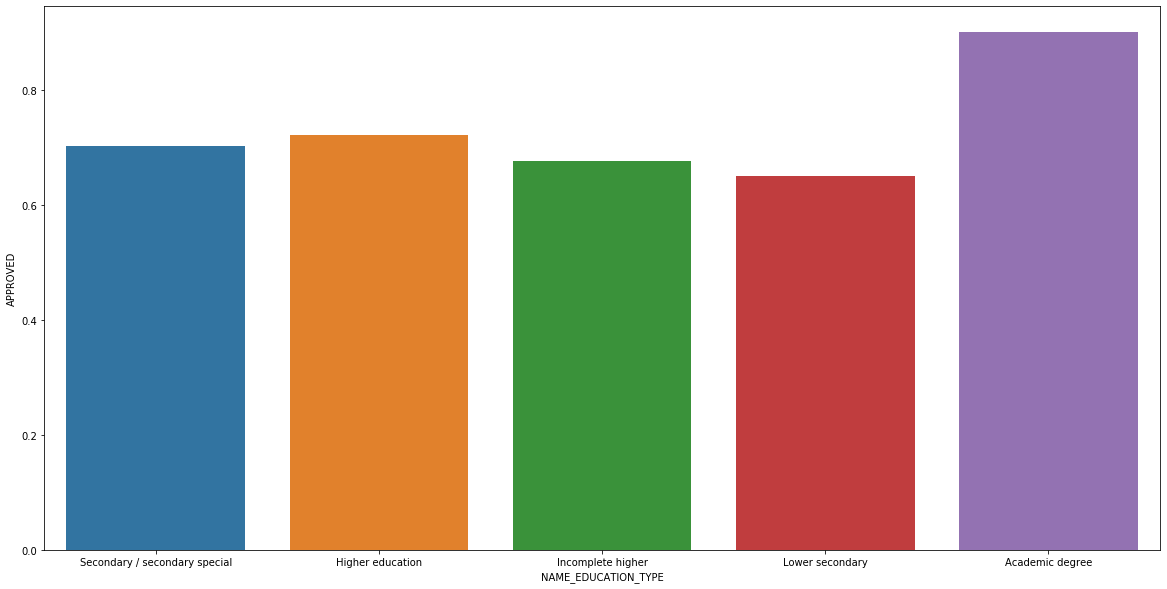

In [56]:
plt.figure(figsize=(20,10))

sns.barplot(data = dfq, x = "NAME_EDUCATION_TYPE", y = "APPROVED", ci = None)


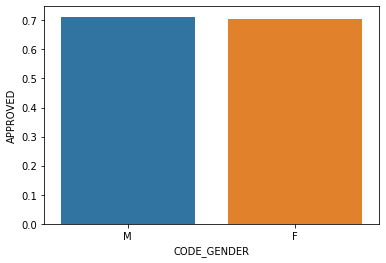

In [57]:

sns.barplot(data = dfq, x = "CODE_GENDER", y = "APPROVED", ci = None)


OBJECTIVE 3

In [58]:
dfz.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,Security staff,2,C,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,Sales staff,1,0,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,Sales staff,1,C,1
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,Sales staff,1,C,1
7,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.224658,1,Accountants,2,0,0


In [59]:
dfz["AMT_INCOME_TOTAL"].groupby(dfz["STATUS"]).mean()

STATUS
0    187987.846007
1    189367.118182
2    205500.000000
3    127500.000000
4    168750.000000
5    204589.285714
C    187424.782886
X    191037.103499
Name: AMT_INCOME_TOTAL, dtype: float64

In [60]:
dfz["AGE"].groupby(dfz["STATUS"]).mean()

STATUS
0    40.819673
1    39.746036
2    38.076256
3    33.785388
4    29.467808
5    43.276190
C    40.761102
X    40.160888
Name: AGE, dtype: float64

In [61]:
 pd.crosstab(dfz["FLAG_OWN_REALTY"], dfz["STATUS"], margins=True)

STATUS,0,1,2,3,4,5,C,X,All
FLAG_OWN_REALTY,,,,,,,,,
N,1603,70,6,2,4,28,3150,1152,6015
Y,3105,95,6,1,0,14,5638,1935,10794
All,4708,165,12,3,4,42,8788,3087,16809


In [62]:
 pd.crosstab(dfz["FLAG_OWN_CAR"], dfz["STATUS"], margins=True)

STATUS,0,1,2,3,4,5,C,X,All
FLAG_OWN_CAR,,,,,,,,,
N,2797,88,8,2,2,36,5096,1803,9832
Y,1911,77,4,1,2,6,3692,1284,6977
All,4708,165,12,3,4,42,8788,3087,16809


In [63]:
 pd.crosstab(dfz["NAME_FAMILY_STATUS"], dfz["STATUS"], margins=True)

STATUS,0,1,2,3,4,5,C,X,All
NAME_FAMILY_STATUS,,,,,,,,,
Civil marriage,379,14,1,0,0,0,784,262,1440
Married,3250,111,6,2,1,13,6122,2161,11666
Separated,271,9,0,0,0,1,488,190,959
Single / not married,692,28,4,1,3,26,1208,394,2356
Widow,116,3,1,0,0,2,186,80,388
All,4708,165,12,3,4,42,8788,3087,16809


In [64]:
pd.crosstab(dfz["CNT_CHILDREN"], dfz["STATUS"], margins=True)

STATUS,0,1,2,3,4,5,C,X,All
CNT_CHILDREN,,,,,,,,,
0,3046,108,4,0,2,22,5719,1964,10865
1,1088,41,0,0,0,5,2027,753,3914
2,491,13,0,0,0,1,931,324,1760
3,68,2,7,2,1,8,97,37,222
4,12,1,1,0,1,6,11,7,39
5,3,0,0,1,0,0,3,2,9
All,4708,165,12,3,4,42,8788,3087,16809


In [68]:
pd.crosstab(dfz["CURRENT EMPLOY"], dfz["STATUS"], margins=True)

STATUS,0,1,2,3,4,5,C,X,All
CURRENT EMPLOY,,,,,,,,,
0,0,0,2,3,1,31,0,0,37
1,4708,165,10,0,3,11,8788,3087,16772
All,4708,165,12,3,4,42,8788,3087,16809


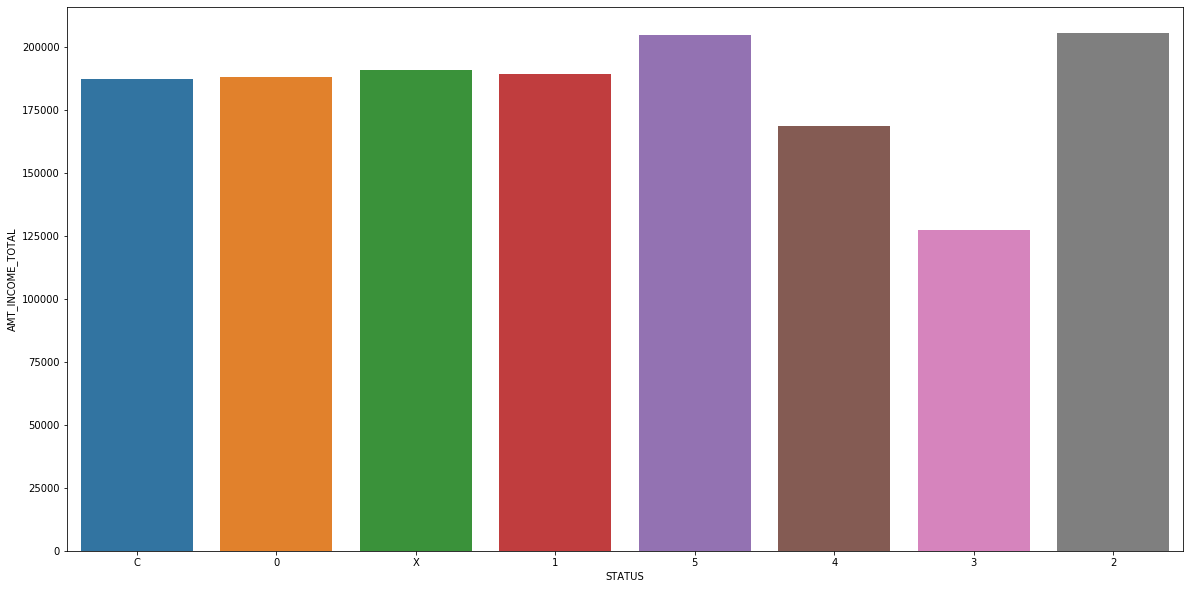

In [65]:
plt.figure(figsize=(20,10))

sns.barplot(data = dfz, x = "STATUS", y = "AMT_INCOME_TOTAL", ci = None)

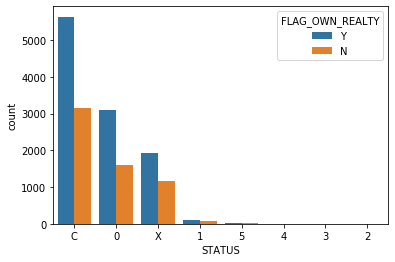

In [66]:
sns.countplot(data = dfz, x = "STATUS", hue = "FLAG_OWN_REALTY")

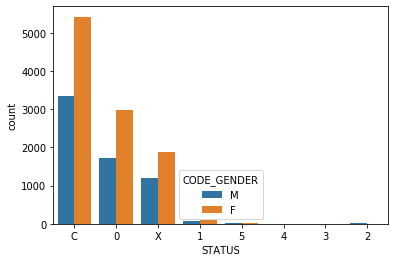

In [67]:
sns.countplot(data = dfz, x = "STATUS", hue = "CODE_GENDER")

OBJECTIVE 4

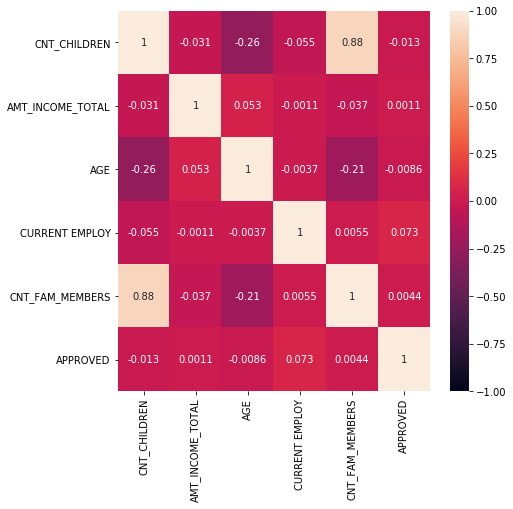

In [69]:
plt.figure(figsize=(7,7))

# calculate the correlation matrix for the numeric dataset 
corr = dfz.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

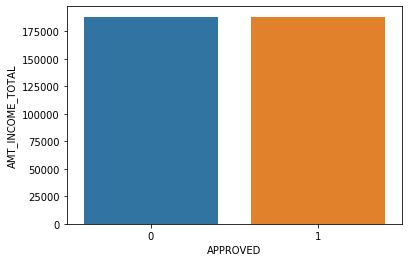

In [70]:
sns.barplot(data = dfz, x = "APPROVED", y = "AMT_INCOME_TOTAL", ci = None)

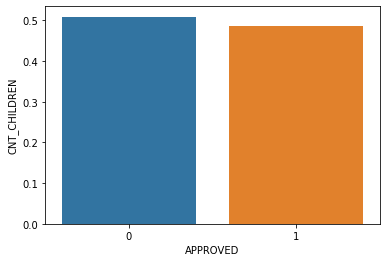

In [71]:
sns.barplot(data = dfz, x = "APPROVED", y = "CNT_CHILDREN", ci = None)

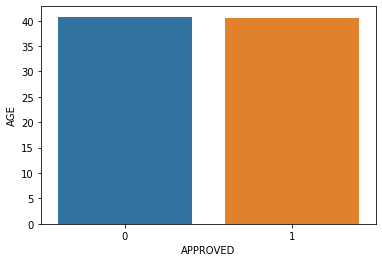

In [72]:
sns.barplot(data = dfz, x = "APPROVED", y = "AGE", ci = None)

In [73]:
dfz.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,Security staff,2,C,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,Sales staff,1,0,0


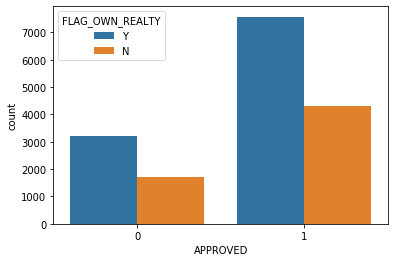

In [74]:
sns.countplot(data = dfz, x = "APPROVED", hue = "FLAG_OWN_REALTY")

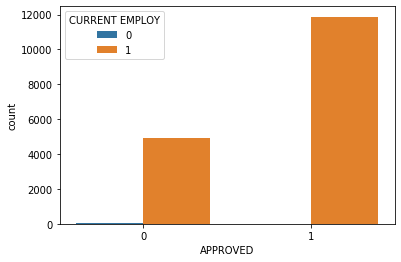

In [75]:
sns.countplot(data = dfz, x = "APPROVED", hue = "CURRENT EMPLOY")

In [ ]:
sns.countplot(data = dfz, x = "STATUS", hue = "FLAG_OWN_CAR")

In [ ]:
sns.countplot(data = dfz, x = "STATUS", hue = "CODE_GENDER")

In [ ]:
sns.countplot(data = dfz, x = "STATUS", hue = "CODE_GENDER")